<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открываем-данные,-выводим-общую-информацию" data-toc-modified-id="Открываем-данные,-выводим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открываем данные, выводим общую информацию</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-и-проверка-данных" data-toc-modified-id="Анализ-и-проверка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ и проверка данных</a></span></li><li><span><a href="#Анализ-воронки-событий" data-toc-modified-id="Анализ-воронки-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ воронки событий</a></span></li><li><span><a href="#Анализируем-результаты-эксперимента" data-toc-modified-id="Анализируем-результаты-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализируем результаты эксперимента</a></span></li></ul></div>

# Анализ поведения пользователей в мобильном приложении

Мы работаем в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи нашего мобильного приложения.

Изучить воронку продаж. Узнать, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследовать результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выяснить, какой шрифт лучше.

_Описание данных._

Структура `logs_exp.csv`. Каждая запись в логе — это действие пользователя, или событие.
- `EventName` — название события;
- `DeviceIDHash` — уникальный идентификатор пользователя;
- `EventTimestamp` — время события;
- `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

*Цели и задачи:*
1. Открыть файл с данными и изучить общую информацию.
2. Подготовить данные.
    - Заменить названия столбцов на более удобные;
    - Проверить пропуски и типы данных. Откорректировать при необходимости;
    - Добавить столбец даты и времени, а также отдельный столбец дат.
3. Изучить и проверить данные.
    - Сколько всего событий в логе?
    - Сколько всего пользователей в логе?
    - Сколько в среднем событий приходится на пользователя?
    - Данными за какой период мы располагаем? Найти максимальную и минимальную дату. Построить гистограмму по дате и времени. Можно ли быть уверенным, что у нас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определить, с какого момента данные полные и отбросить более старые. Данными за какой период времени мы располагаем на самом деле?
    - Много ли событий и пользователей мы потеряли, отбросив старые данные?
    - Проверить, что у нас есть пользователи из всех трёх экспериментальных групп.
4. Изучить воронку событий.
    - Посмотреть, какие события есть в логах, как часто они встречаются. Отсортировать события по частоте.
    - Посчитать, сколько пользователей совершали каждое из этих событий. Отсортировать события по числу пользователей. Посчитать долю пользователей, которые хоть раз совершали событие.
    - Предположить, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
    - По воронке событий посчитать, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитать отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
    - На каком шаге теряем больше всего пользователей?
    - Какая доля пользователей доходит от первого события до оплаты?
5. Изучить результаты эксперимента.
    - Сколько пользователей в каждой экспериментальной группе?
    - Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверить, находят ли статистические критерии разницу между выборками 246 и 247.
    - Выберать самое популярное событие. Посчитать число пользователей, совершивших это событие в каждой из контрольных групп. Посчитать долю пользователей, совершивших это событие. Проверить, будет ли отличие между группами статистически достоверным. Проделать то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
    - Аналогично поступить с группой с изменённым шрифтом. Сравнить результаты с каждой из контрольных групп в отдельности по каждому событию. Сравнить результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
    - Какой уровень значимости мы выбрали при проверке статистических гипотез выше? Посчитать, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделать предыдущие пункты и проверить свои выводы.

## Открываем данные, выводим общую информацию

In [48]:
# импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import os
import math as mth
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
# улучшаем качество графиков (разрешение)
%config InlineBackend.figure_format = 'retina'

In [3]:
# считываем файл
pth1 = 'C:/Users/sorial/Desktop/my_projects/startup_project/logs_exp.csv'
pth2 = '/datasets/logs_exp.csv'

if os.path.exists(pth1):
    logs = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    logs = pd.read_csv(pth2, sep='\t')
else:
    print('Что-то пошло не так')

## Подготовка данных

In [4]:
logs.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


*Промежуточный вывод:* столбцы не содержат пропусков.

In [6]:
# переименуем столбцы
logs.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']

In [7]:
# отдельно выделим столбцы с датой и временем
# и просто датой
logs['dt'] = pd.to_datetime(logs['event_timestamp'], unit='s')
logs['date'] = logs['dt'].dt.date

In [8]:
#logs.head(5)

In [9]:
# проверим наличие явных дубликатов
logs.loc[logs.duplicated()]

,event_name,device_id_hash,event_timestamp,exp_id,dt,date
453,MainScreenAppear,5613408041324010552,1564474784,248,2019-07-30 08:19:44,2019-07-30
2350,CartScreenAppear,1694940645335807244,1564609899,248,2019-07-31 21:51:39,2019-07-31
3573,MainScreenAppear,434103746454591587,1564628377,248,2019-08-01 02:59:37,2019-08-01
4076,MainScreenAppear,3761373764179762633,1564631266,247,2019-08-01 03:47:46,2019-08-01
4803,MainScreenAppear,2835328739789306622,1564634641,248,2019-08-01 04:44:01,2019-08-01
...,...,...,...,...,...,...
242329,MainScreenAppear,8870358373313968633,1565206004,247,2019-08-07 19:26:44,2019-08-07
242332,PaymentScreenSuccessful,4718002964983105693,1565206005,247,2019-08-07 19:26:45,2019-08-07
242360,PaymentScreenSuccessful,2382591782303281935,1565206049,246,2019-08-07 19:27:29,2019-08-07
242362,CartScreenAppear,2382591782303281935,1565206049,246,2019-08-07 19:27:29,2019-08-07


В таблице обнаружено 413 строк дубликатов, мы можем их просто удалить, чтобы они не повлияли на дальнейший анализ.

In [10]:
logs = logs.drop_duplicates()
logs.loc[logs.duplicated()]

,event_name,device_id_hash,event_timestamp,exp_id,dt,date


## Анализ и проверка данных

Проверим сколько всего событий в логах.

In [11]:
logs['event_name'].count()

243713

Итого в логах имеется 243713 событий.

Посчитаем сколько всего уникальных пользователей.

In [12]:
logs['device_id_hash'].nunique()

7551

Всего 7551 уникальных пользователей.

Посчитаем сколько в среднем событий приходится на одного пользователя

In [13]:
logs.groupby('device_id_hash')['event_name'].count().mean()

32.27559263673685

Итого на одного пользователя в среднем приходится 32 события.

Посмотрим за какой период имеются данные. Посчитаем минимальную и максимальную дату. Построим гистрограмму по дате и времени.

In [14]:
print(logs['dt'].min())
print(logs['dt'].max())

2019-07-25 04:43:36
2019-08-07 21:15:17


Минимальная дата 2019-07-25, максимальная 2019-08-07, т.е. имеются данные за две недели.

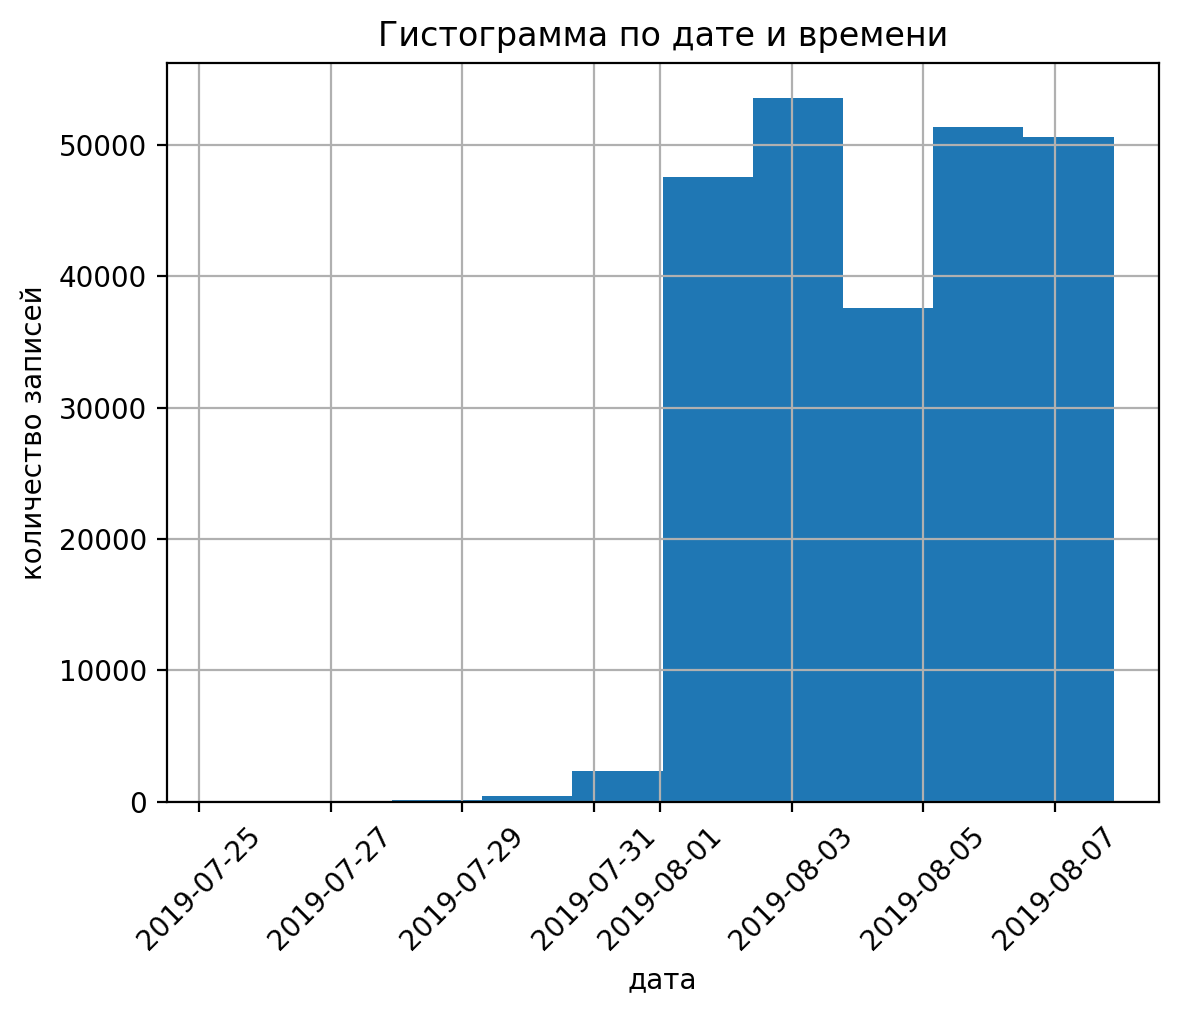

In [15]:
logs['dt'].hist()

plt.xticks(rotation=45)
plt.ylabel('количество записей')
plt.xlabel('дата')
plt.title('Гистограмма по дате и времени')
plt.show()

**Вывод по гистрограмме:** из графика можно заметить, что количество данных наиболее полное начиная с 2019-08-01, до этого дня данных в значительной степени меньше.

Отбросим старые данные, оставим только те события, которые происходили начиная с 2019-08-01.

In [16]:
logs_relevant = logs.query('dt >= "2019-08-01"')

Посмотрим как много пользователей и событий было потеряно в результате фильтровки.

In [17]:
print('Абсолютное число оставшихся пользователей:', logs_relevant['device_id_hash'].nunique())
print('Процентное соотношение оставшихся пользователей ко всем: {0:.2f}%'.format( 
      logs_relevant['device_id_hash'].nunique() / logs['device_id_hash'].nunique() * 100))

Абсолютное число оставшихся пользователей: 7534
Процентное соотношение оставшихся пользователей ко всем: 99.77%


In [18]:
print('Абсолютное число оставшихся событий:', logs_relevant['event_name'].count())
print('Процентное соотношение оставшихся пользователей ко всем: {0:.2f}%'.format( 
      logs_relevant['event_name'].count() / logs['event_name'].count() * 100))

Абсолютное число оставшихся событий: 240887
Процентное соотношение оставшихся пользователей ко всем: 98.84%


**Вывод о фильтровке:** мы отфильтровали ненужные данные, при этом потеряли всего около 0.23% уникальных пользователей и 1.16% от всех событий, следовательно такие минимальные потери не должны повлиять на дальнейший анализ. 

Также проверим сколько пользователей у нас осталось в каждой группе теста.

In [40]:
quantity_of_users_per_group = logs_relevant.groupby('exp_id')['device_id_hash'].nunique()
quantity_of_users_per_group

exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64

**Вывод:** в каждой группе остались уникальные пользователи, примерно в равных значениях.

## Анализ воронки событий

Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [20]:
(
    logs_relevant
    .groupby('event_name')
    .agg({'event_name':'count'})
    .rename(columns={'event_name':'quantity_of_events'})
    .sort_values(by='quantity_of_events', ascending=False)
)

,quantity_of_events
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


**Вывод:** получилось всего 5 уникальных событий: появление основного экрана, появление экрана предложений, появления экрана корзины, экран успешной покупки, туториал. При этом туториал был задействован меньше всех: 1005 раз, а на основной экан попадали 117328 раз.

Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [22]:
funnel_events = \
(
    logs_relevant
    .groupby('event_name')
    .agg({'device_id_hash':'nunique'})
    .rename(columns={'device_id_hash':'quantity_of_users'})
    .sort_values(by='quantity_of_users', ascending=False)
)

**Вывод:** у 7419 уникальных пользователей появлялся основной экран, и меньше всего уникальных пользователей прошло событие туториал.

Предположить, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

**Предположение:** на основе предыдущих выводов, можно предположить, что события выстраиваются в следующую цепочку: *MainScreenAppear*, *OffersScreenAppear*, *CartScreenAppear*, *PaymentScreenSuccessful*. Исходя из логики, получается та же цепочка, т.е. сначала пользователь заходит на основной экран, далее переходит на экран предложений, добавляет в корзину желаемый продукт и оплачивает его. Туториал при этом стоит исключить, т.к. он не вписывается в данную цепь. 

По воронке событий посчитать, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитать отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [27]:
funnel_events['rel_decrease'] = abs(1+funnel_events['quantity_of_users'].pct_change()).round(2)
funnel_events

,quantity_of_users,rel_decrease
event_name,,
MainScreenAppear,7419,NaN
OffersScreenAppear,4593,0.62
CartScreenAppear,3734,0.81
PaymentScreenSuccessful,3539,0.95
Tutorial,840,0.24


На каком шаге теряется больше всего пользователей?

**Вывод:** не учитывая туториал, больше всего людей теряется на шаге с предложениями.

Какая доля пользователей доходит от первого события до оплаты?

In [37]:
success_rel = (
    funnel_events.loc['PaymentScreenSuccessful', 'quantity_of_users']\
    / funnel_events.loc['MainScreenAppear', 'quantity_of_users']
)
print('От первого шага до оплаты доходит: {0:.1f}% пользователей'.format(success_rel*100))

От первого шага до последнего шага доходит: 47.7% пользователей


**Вывод:** от первого шага (MainScreenAppear) до оплаты (PaymentScreenSuccessful) доходит 47.7% пользователей.

## Анализируем результаты эксперимента

Посчитаем сколько пользователей в каждой экспериментальной группе.

In [38]:
quantity_of_users_per_group

exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64

**Вывод:** в каждой группе остались уникальные пользователи, примерно в равных значениях.

Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

In [45]:
exp_246 = (

    logs_relevant
    .query('exp_id == 246')
    .groupby('event_name')
    .agg({'device_id_hash':'nunique'})
    .rename(columns={'device_id_hash':'quantity_of_users'})
    .sort_values(by='quantity_of_users', ascending=False)
)
exp_246['rel_decrease'] = abs(1+exp_246['quantity_of_users'].pct_change()).round(2)
exp_246

,quantity_of_users,rel_decrease
event_name,,
MainScreenAppear,2450,NaN
OffersScreenAppear,1542,0.63
CartScreenAppear,1266,0.82
PaymentScreenSuccessful,1200,0.95
Tutorial,278,0.23


In [46]:
exp_247 = (
    logs_relevant
    .query('exp_id == 247')
    .groupby('event_name')
    .agg({'device_id_hash':'nunique'})
    .rename(columns={'device_id_hash':'quantity_of_users'})
    .sort_values(by='quantity_of_users', ascending=False)
)
exp_247['rel_decrease'] = abs(1+exp_247['quantity_of_users'].pct_change()).round(2)
exp_247

,quantity_of_users,rel_decrease
event_name,,
MainScreenAppear,2476,NaN
OffersScreenAppear,1520,0.61
CartScreenAppear,1238,0.81
PaymentScreenSuccessful,1158,0.94
Tutorial,283,0.24


In [47]:
delta_AA = exp_246['rel_decrease'] - exp_247['rel_decrease']
delta_AA

event_name
MainScreenAppear            NaN
OffersScreenAppear         0.02
CartScreenAppear           0.01
PaymentScreenSuccessful    0.01
Tutorial                  -0.01
Name: rel_decrease, dtype: float64

**Промежуточный вывод:** мы проверили на сколько процентов отличается относительные приросты между событиями в группах А и А, выяснили что различия в них 1-2%, что допустимо.

Чтобы подтвердить что группы A и A не отличаются проверим гипотезу о равенстве долей.

Для начала A/A тестирования сформируем гипотезы - нулевую и альтернативную:
```
H_0: доля пользователей дошедших до последнего шага группы A = доля пользователей дошедших до последнего шага группы A
H_a: доля пользователей дошедших до последнего шага группы A ≠ доля пользователей дошедших до последнего шага группы A
alpha = 0.05
```

In [50]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([exp_246.loc['PaymentScreenSuccessful', 'quantity_of_users'],
                      exp_247.loc['PaymentScreenSuccessful', 'quantity_of_users']])
trials = np.array([exp_246.loc['MainScreenAppear', 'quantity_of_users'],
                   exp_247.loc['MainScreenAppear', 'quantity_of_users']])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.12044299485641763
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** не получилось отвергнуть нулевую гипотезу, а значит нет основний считать доли разными